In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
Life_exp = pd.read_csv('Life Expectancy Data.csv')
Life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print(f'Shape of the dataset: {Life_exp.shape}')

Shape of the dataset: (2938, 22)


In [4]:
print(f'Columns present in the dataset: \n\n{list(Life_exp.columns)}')

Columns present in the dataset: 

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
# Removing unnecessary spaces by replacing them with the underscore '_'
Life_exp.columns = Life_exp.columns.str.strip().str.replace(' ','_')

In [6]:
# renaming a column name appropriately
Life_exp.rename(columns = {'thinness__1-19_years':'thinness_1-19_years'}, inplace=True)
print(f'Adjusted columns names: \n\n{list(Life_exp.columns)}')

Adjusted columns names: 

['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


In [7]:
Life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Displaying the float values with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [9]:
Life_exp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.00,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2015.00
Life_expectancy,2928.00,69.22,9.52,36.30,63.10,72.10,75.70,89.00
Adult_Mortality,2928.00,164.80,124.29,1.00,74.00,144.00,228.00,723.00
infant_deaths,2938.00,30.30,117.93,0.00,0.00,3.00,22.00,1800.00
Alcohol,2744.00,4.60,4.05,0.01,0.88,3.75,7.70,17.87
percentage_expenditure,2938.00,738.25,1987.91,0.00,4.69,64.91,441.53,19479.91
Hepatitis_B,2385.00,80.94,25.07,1.00,77.00,92.00,97.00,99.00
Measles,2938.00,2419.59,11467.27,0.00,0.00,17.00,360.25,212183.00
BMI,2904.00,38.32,20.04,1.00,19.30,43.50,56.20,87.30
under-five_deaths,2938.00,42.04,160.45,0.00,0.00,4.00,28.00,2500.00


In [10]:
Life_exp.describe(include = 'O')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [11]:
print(f'number of null values per column: \n\n{Life_exp.isna().sum()}')

number of null values per column: 

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [12]:
print(f'Percentage of null values per column: \n\n{Life_exp.isna().sum()/len(Life_exp)}')

Percentage of null values per column: 

Country                           0.00
Year                              0.00
Status                            0.00
Life_expectancy                   0.00
Adult_Mortality                   0.00
infant_deaths                     0.00
Alcohol                           0.07
percentage_expenditure            0.00
Hepatitis_B                       0.19
Measles                           0.00
BMI                               0.01
under-five_deaths                 0.00
Polio                             0.01
Total_expenditure                 0.08
Diphtheria                        0.01
HIV/AIDS                          0.00
GDP                               0.15
Population                        0.22
thinness_1-19_years               0.01
thinness_5-9_years                0.01
Income_composition_of_resources   0.06
Schooling                         0.06
dtype: float64


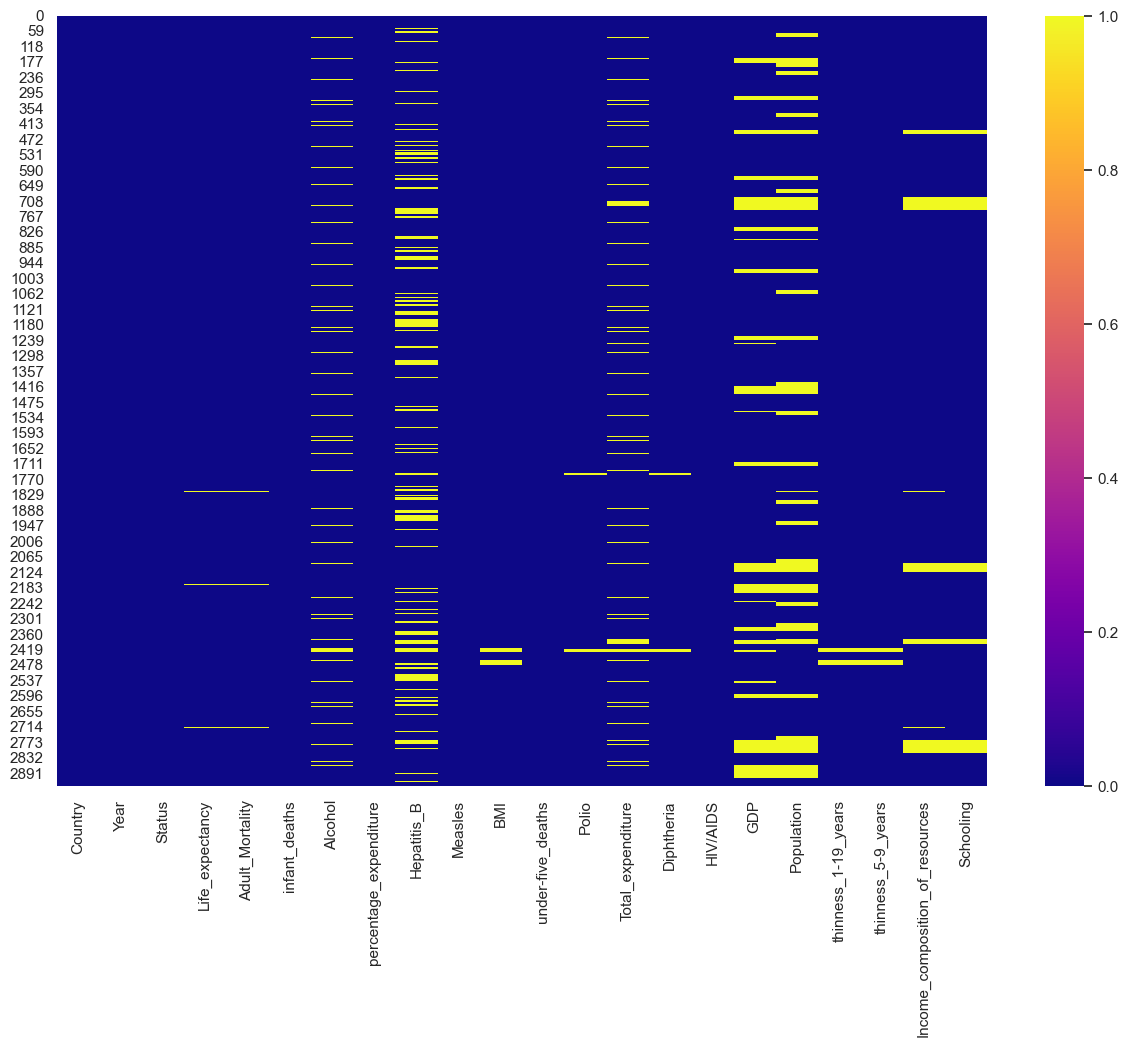

In [13]:
# visual representation of the missing value within the dataset
plt.figure(figsize=(15, 10))
sns.heatmap(Life_exp.isna(), cmap='plasma')
plt.show()

In [14]:
# Discovering duplicate rows in the dataset
print(f'Total number of duplicate rows: {Life_exp.duplicated().sum()}')

Total number of duplicate rows: 0


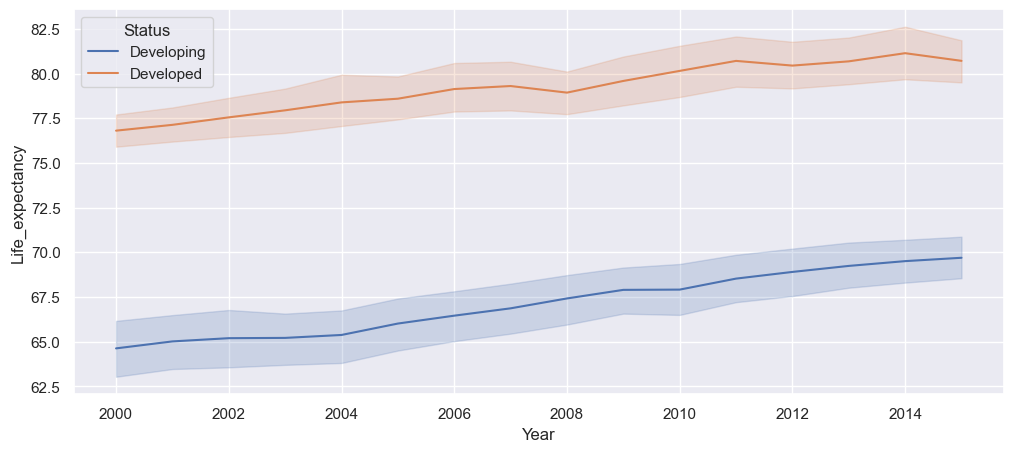

In [15]:
# Life expectancy over the years based on the country status
plt.figure(figsize=(12,5))
sns.lineplot(Life_exp, x='Year', y='Life_expectancy', hue='Status')
plt.show()

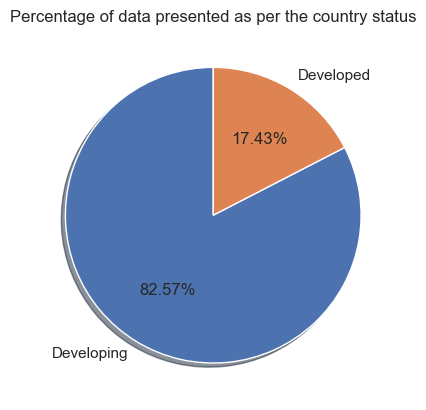

In [16]:
# Percentage of data presented as per the country status
plt.title('Percentage of data presented as per the country status')
plt.pie(x=Life_exp['Status'].value_counts(), labels=Life_exp['Status'].value_counts().index, autopct='%.2f%%', shadow=True, startangle=90)
plt.show()

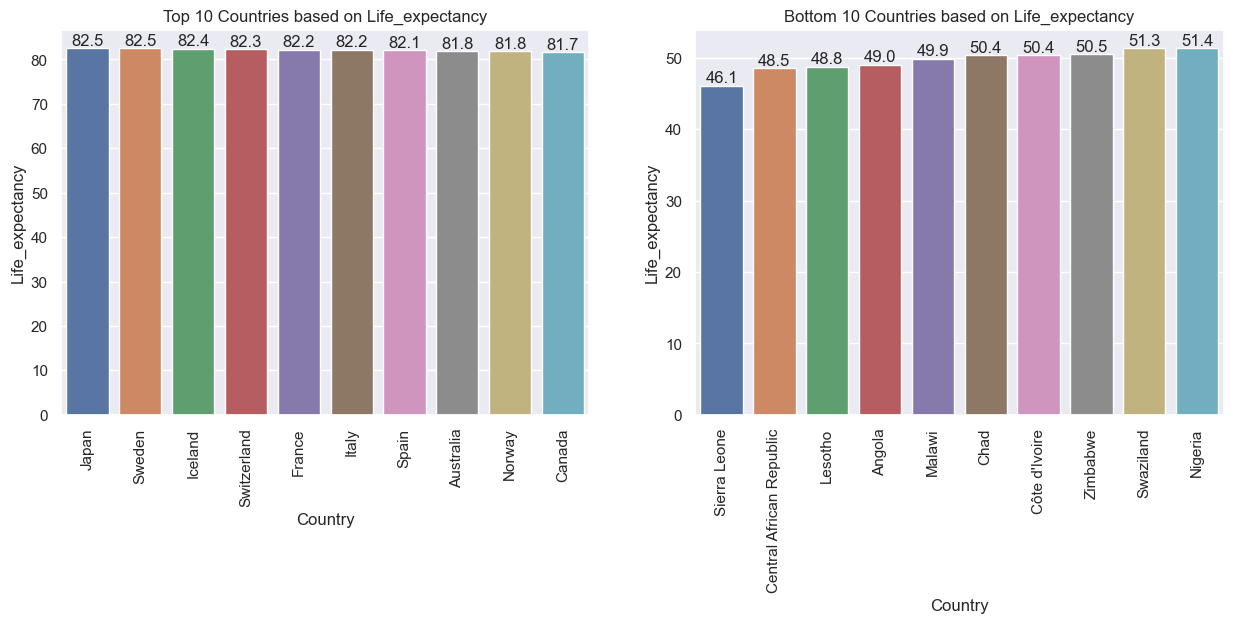

In [17]:
top_data = pd.DataFrame(Life_exp.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(Life_exp.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = True).head(10))

# Display of top and bottom 10 countries on Life_expectancy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data, x = top_data.index, y = 'Life_expectancy')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life_expectancy')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

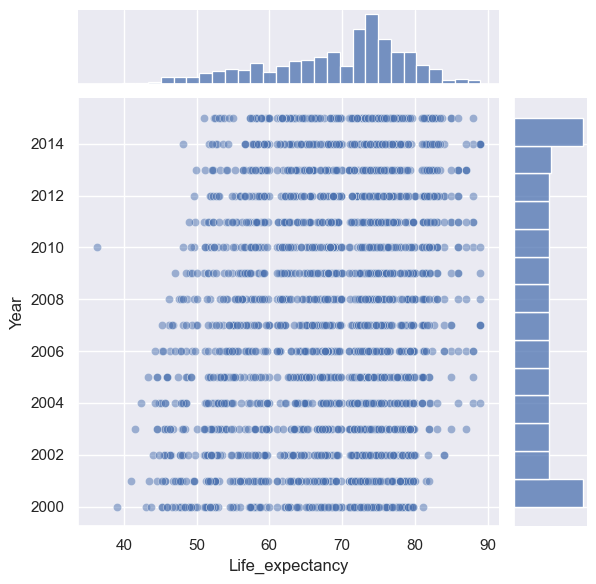

In [18]:
sns.jointplot(x='Life_expectancy', y='Year', data=Life_exp, alpha=0.5)

In [19]:
#Separating the numerical features from the dataset

num_df = Life_exp.select_dtypes(include=np.number)
num_df.drop(['Year'], axis = 1, inplace = True)

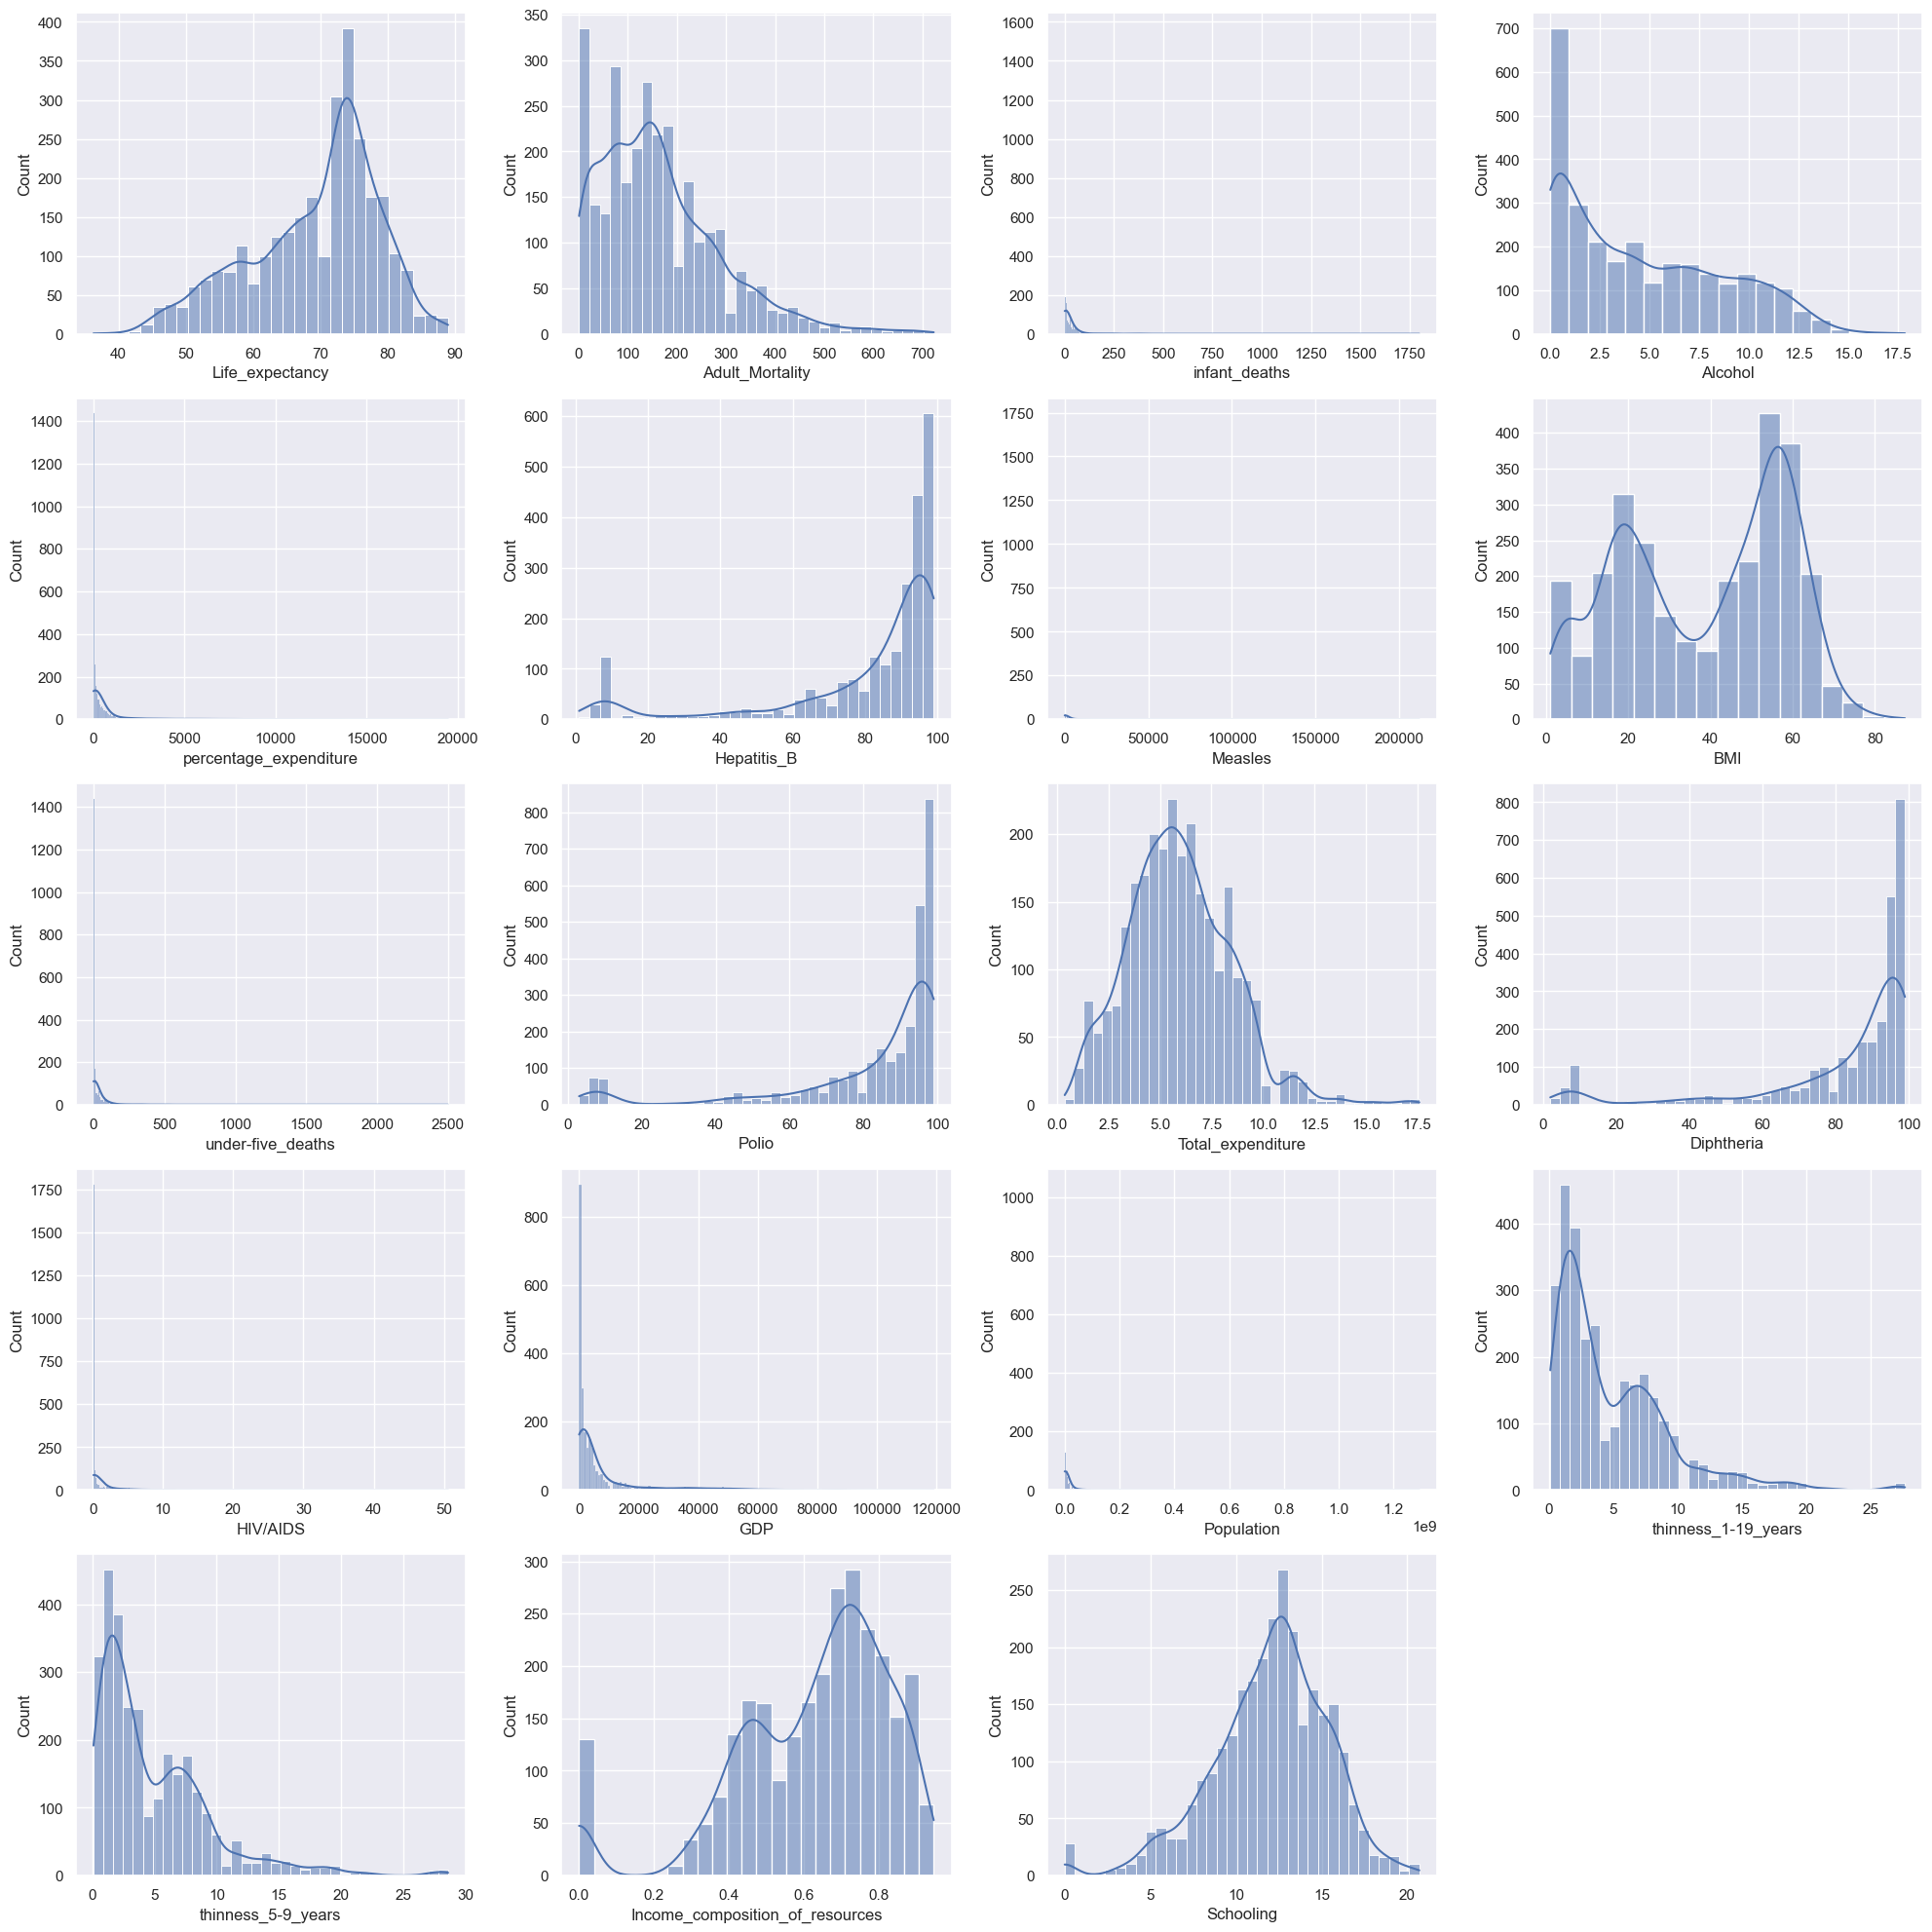

In [20]:
# Checking the distribution of each feature using histogram

plt.figure(figsize=(20,20))
for col in range(len(num_df.columns)):
    plt.subplot(5,4,col+1)
    sns.histplot(num_df,x = num_df.columns[col], kde=True)
plt.tight_layout()
plt.show()

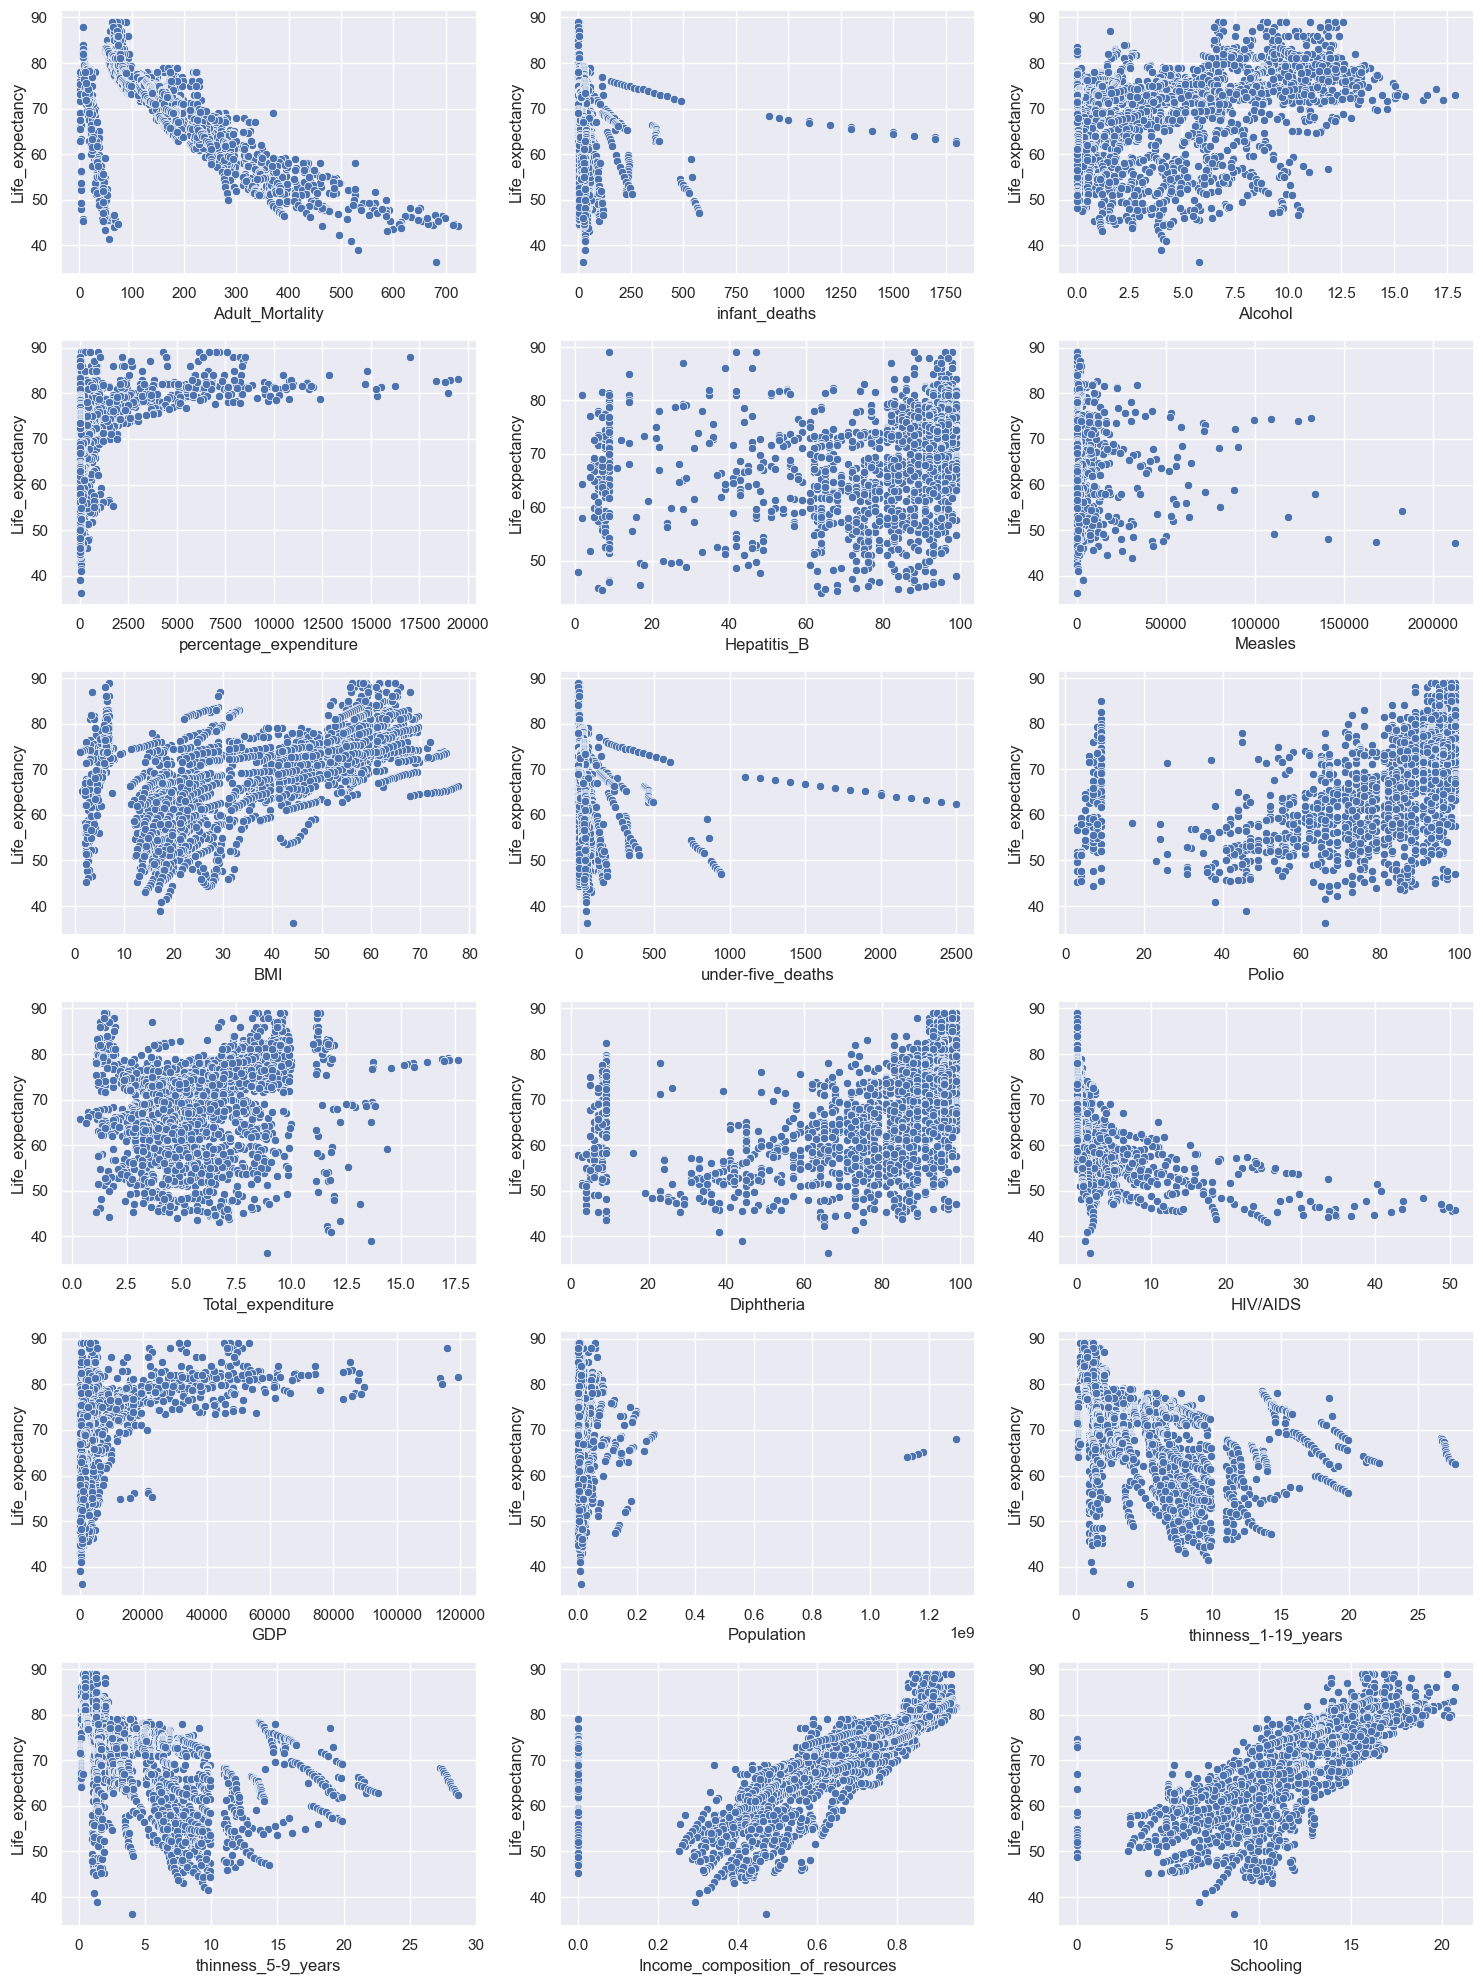

In [21]:
#Relationship between Life_expectancy and other numerical varibales

plt.figure(figsize=(15,20))
for col in range(1,len(num_df.columns)):
    plt.subplot(6,3,col)
    sns.scatterplot(num_df, x = num_df.columns[col], y = 'Life_expectancy')
plt.tight_layout()
plt.show()

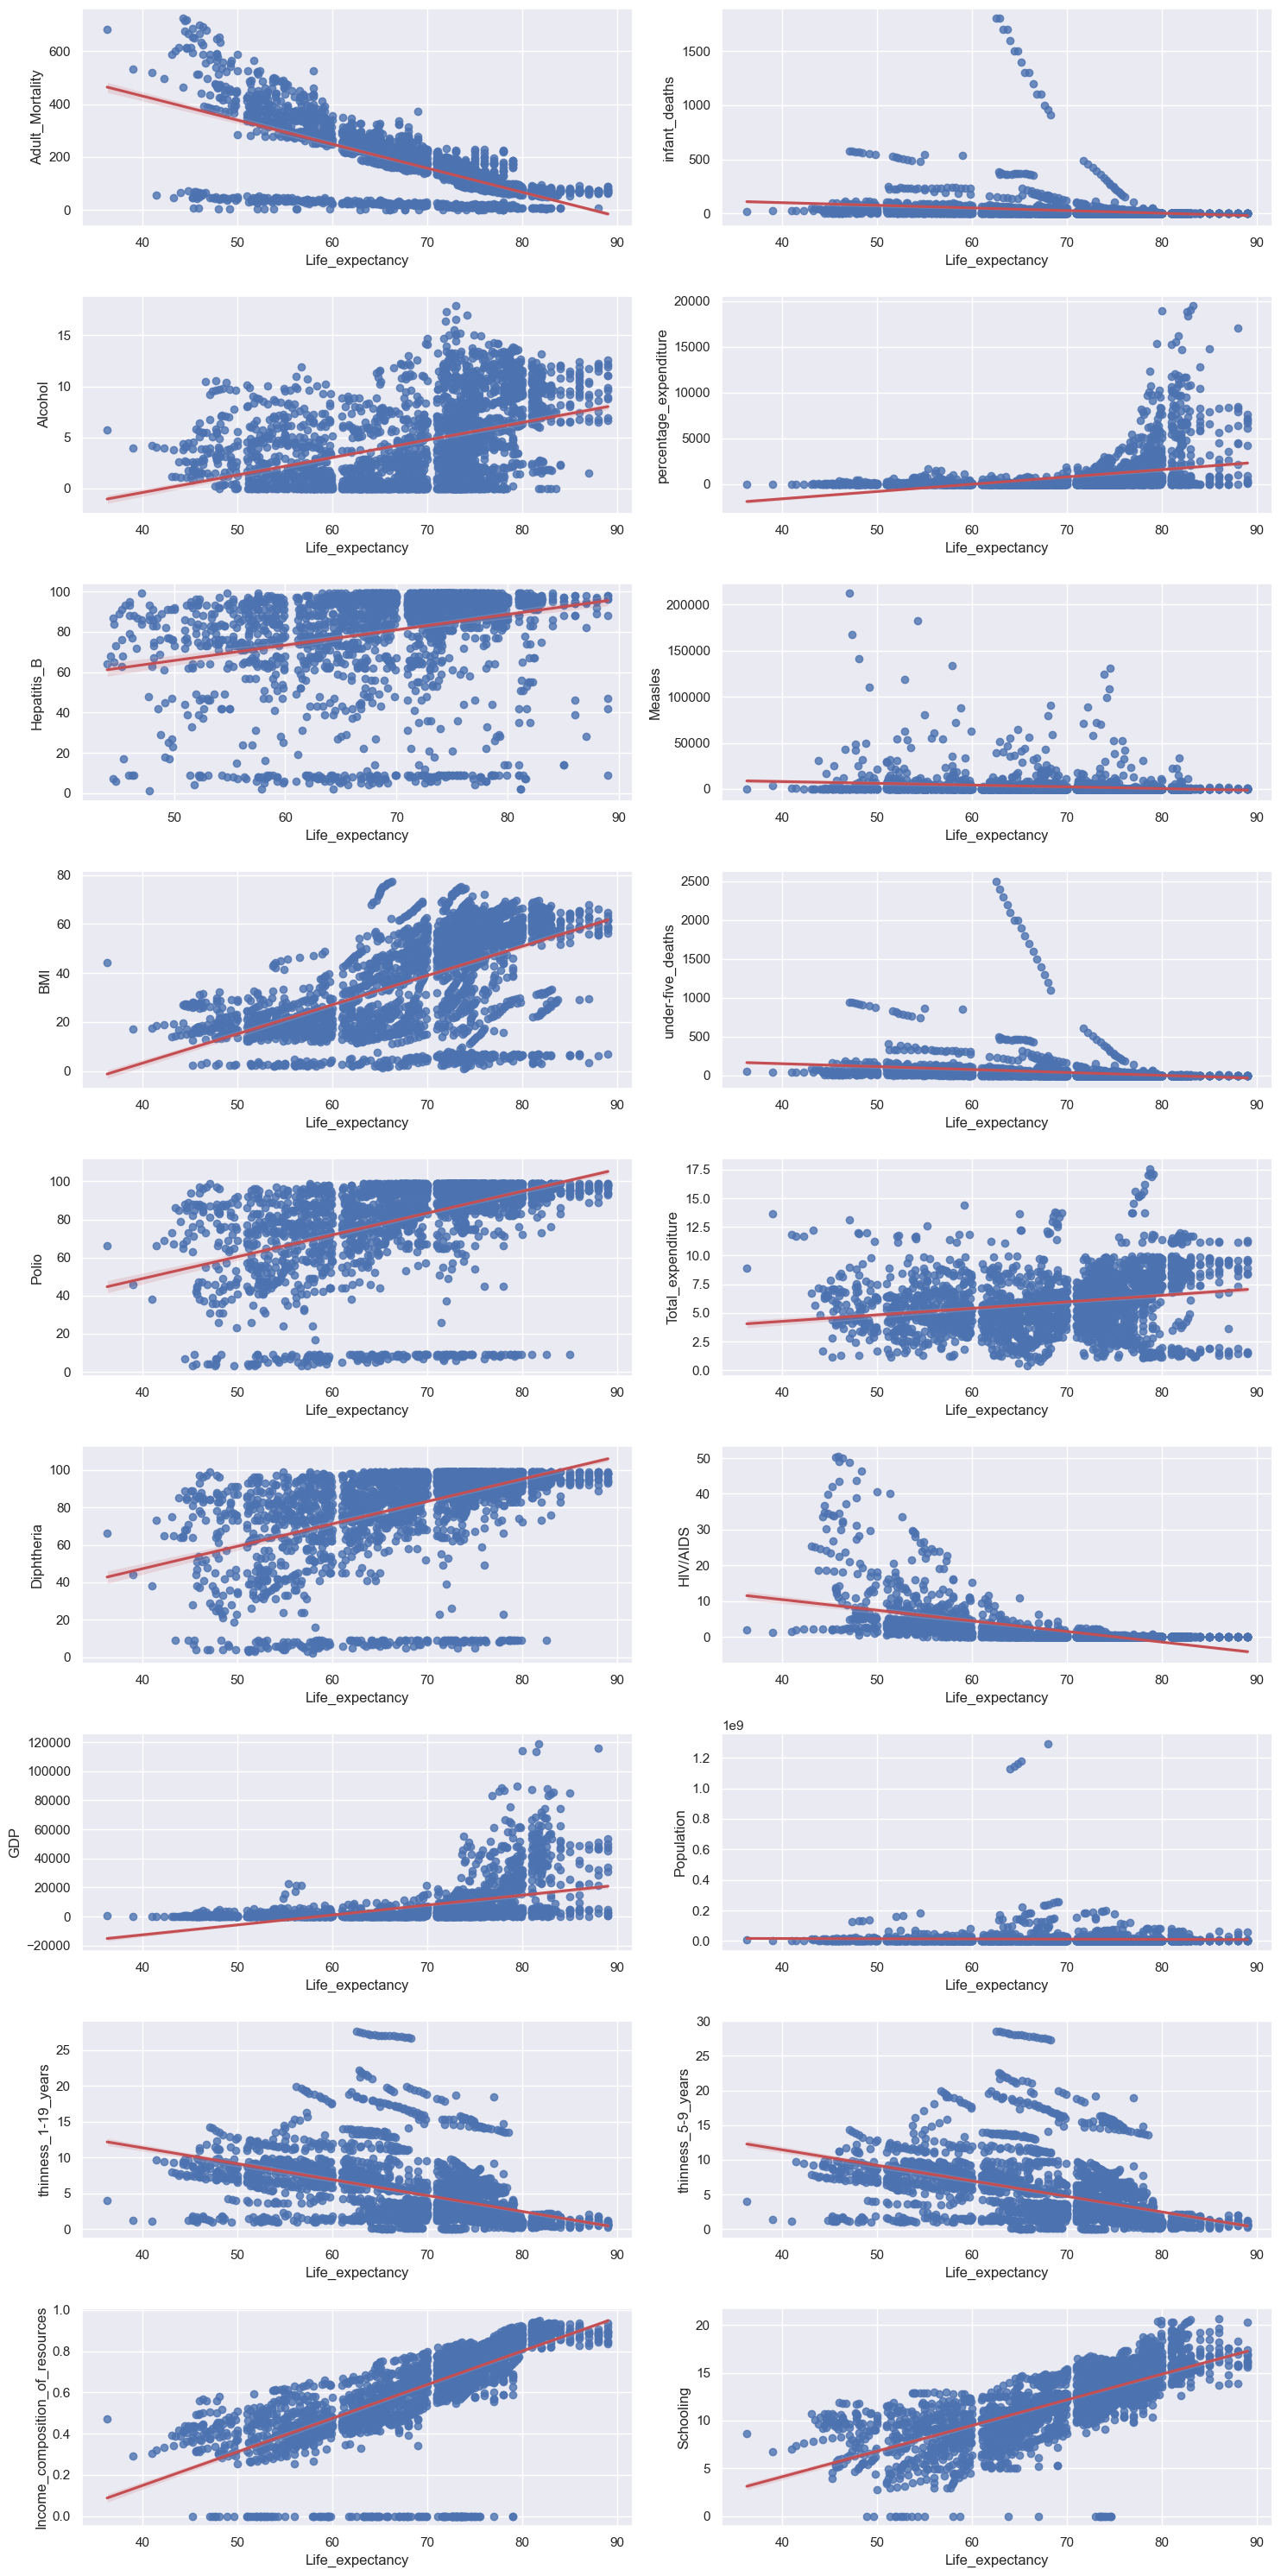

In [22]:
# Visualising the linera relationship between Life_expectancy and other features of the dataset

plt.figure(figsize=(15,30))
for col in range(1,len(num_df.columns)):
    plt.subplot(9,2,col)
    sns.regplot(num_df, y = num_df.columns[col], x = 'Life_expectancy', line_kws = {'color' : 'r'})
plt.tight_layout()
plt.show()

In [23]:
# Splitting the dependent and independent variables of the dataset 

features_df = Life_exp.drop(['Life_expectancy', 'Year'], axis = 1)
target_df = Life_exp.Life_expectancy

columns = list(features_df.columns)
columns.remove('Country')

In [24]:
# number of Null values in the independent variables
print(f'number of NULL values in each column with in Features dataframe: \n\n{features_df.isna().sum()}')

number of NULL values in each column with in Features dataframe: 

Country                              0
Status                               0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [25]:
# Number of NULL values with the Target variable
print(f'number of NULL values within the Target variable: {target_df.isna().sum()}')

number of NULL values within the Target variable: 10


In [26]:
# Isolating the categorical and numerical values independently in the features dataframe
num_features = features_df.select_dtypes(include=np.number).columns.tolist()
cat_features = features_df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Features: \n')
print(num_features, '\n')
print('Categorical Features: \n')
print(cat_features)

Numerical Features: 

['Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'] 

Categorical Features: 

['Country', 'Status']


In [27]:
features_df.copy()
features_df.drop(columns=['Country', 'Status'], inplace=True, axis=0) # dropping the non-numerical features

In [28]:
# Standardizing the numerical values so as not to overwelm the model with far extreme values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')
scaled_num_features = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns)

In [29]:
scaled_num_features.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.79,0.27,-1.13,-0.34,-0.64,-0.11,-0.96,0.26,-3.27,0.89,-0.73,-0.32,-0.48,0.34,2.80,2.76,-0.70,-0.56
1,0.85,0.29,-1.13,-0.33,-0.76,-0.17,-0.98,0.27,-1.05,0.90,-0.86,-0.32,-0.48,-0.20,2.86,2.80,-0.72,-0.59
2,0.83,0.30,-1.13,-0.33,-0.68,-0.17,-1.01,0.29,-0.88,0.88,-0.77,-0.32,-0.48,0.31,2.91,2.85,-0.75,-0.62
3,0.86,0.33,-1.13,-0.33,-0.56,0.03,-1.03,0.32,-0.66,1.03,-0.65,-0.32,-0.48,-0.15,2.96,2.91,-0.78,-0.65
4,0.89,0.35,-1.13,-0.37,-0.52,0.05,-1.05,0.34,-0.62,0.77,-0.60,-0.32,-0.52,-0.16,3.02,2.96,-0.82,-0.74


In [30]:
# Dealing with the missing values within our scaled numerical df

from sklearn.impute import KNNImputer, SimpleImputer
imputer = KNNImputer(n_neighbors=11)
scaled_imputed_num_df = pd.DataFrame(imputer.fit_transform(scaled_num_features), columns=scaled_num_features.columns)

print(f'Number of NULL values per columns after imputation: \n\n{scaled_imputed_num_df.isna().sum()}')

Number of NULL values per columns after imputation: 

Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [31]:
# label encoding the categorical feature to be used in training our model
from sklearn.preprocessing import LabelEncoder

cat_df = pd.DataFrame(Life_exp.Status)

encoder = LabelEncoder()
cat_encoded_df = pd.DataFrame(encoder.fit_transform(cat_df), columns=cat_df.columns)

In [32]:
# Concatenating the encoded cat features with the scaled and imputed num features in one DataFrame

features = pd.concat([cat_encoded_df, scaled_imputed_num_df], axis=1)
features.head()

,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,1,0.79,0.27,-1.13,-0.34,-0.64,-0.11,-0.96,0.26,-3.27,0.89,-0.73,-0.32,-0.48,0.34,2.80,2.76,-0.70,-0.56
1,1,0.85,0.29,-1.13,-0.33,-0.76,-0.17,-0.98,0.27,-1.05,0.90,-0.86,-0.32,-0.48,-0.20,2.86,2.80,-0.72,-0.59
2,1,0.83,0.30,-1.13,-0.33,-0.68,-0.17,-1.01,0.29,-0.88,0.88,-0.77,-0.32,-0.48,0.31,2.91,2.85,-0.75,-0.62
3,1,0.86,0.33,-1.13,-0.33,-0.56,0.03,-1.03,0.32,-0.66,1.03,-0.65,-0.32,-0.48,-0.15,2.96,2.91,-0.78,-0.65
4,1,0.89,0.35,-1.13,-0.37,-0.52,0.05,-1.05,0.34,-0.62,0.77,-0.60,-0.32,-0.52,-0.16,3.02,2.96,-0.82,-0.74


In [33]:
life_exp_final = pd.concat([features, target_df], axis=1)
life_exp_final.head()

,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Life_expectancy
0,1,0.79,0.27,-1.13,-0.34,-0.64,-0.11,-0.96,0.26,-3.27,0.89,-0.73,-0.32,-0.48,0.34,2.80,2.76,-0.70,-0.56,65.00
1,1,0.85,0.29,-1.13,-0.33,-0.76,-0.17,-0.98,0.27,-1.05,0.90,-0.86,-0.32,-0.48,-0.20,2.86,2.80,-0.72,-0.59,59.90
2,1,0.83,0.30,-1.13,-0.33,-0.68,-0.17,-1.01,0.29,-0.88,0.88,-0.77,-0.32,-0.48,0.31,2.91,2.85,-0.75,-0.62,59.90
3,1,0.86,0.33,-1.13,-0.33,-0.56,0.03,-1.03,0.32,-0.66,1.03,-0.65,-0.32,-0.48,-0.15,2.96,2.91,-0.78,-0.65,59.50
4,1,0.89,0.35,-1.13,-0.37,-0.52,0.05,-1.05,0.34,-0.62,0.77,-0.60,-0.32,-0.52,-0.16,3.02,2.96,-0.82,-0.74,59.20


In [34]:
life_exp_final.dropna(inplace=True) #dropping na values
life_exp_final.isna().sum()

Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
Life_expectancy                    0
dtype: int64

In [35]:
#Resetting the index

life_exp_final.reset_index(drop=True,inplace=True)

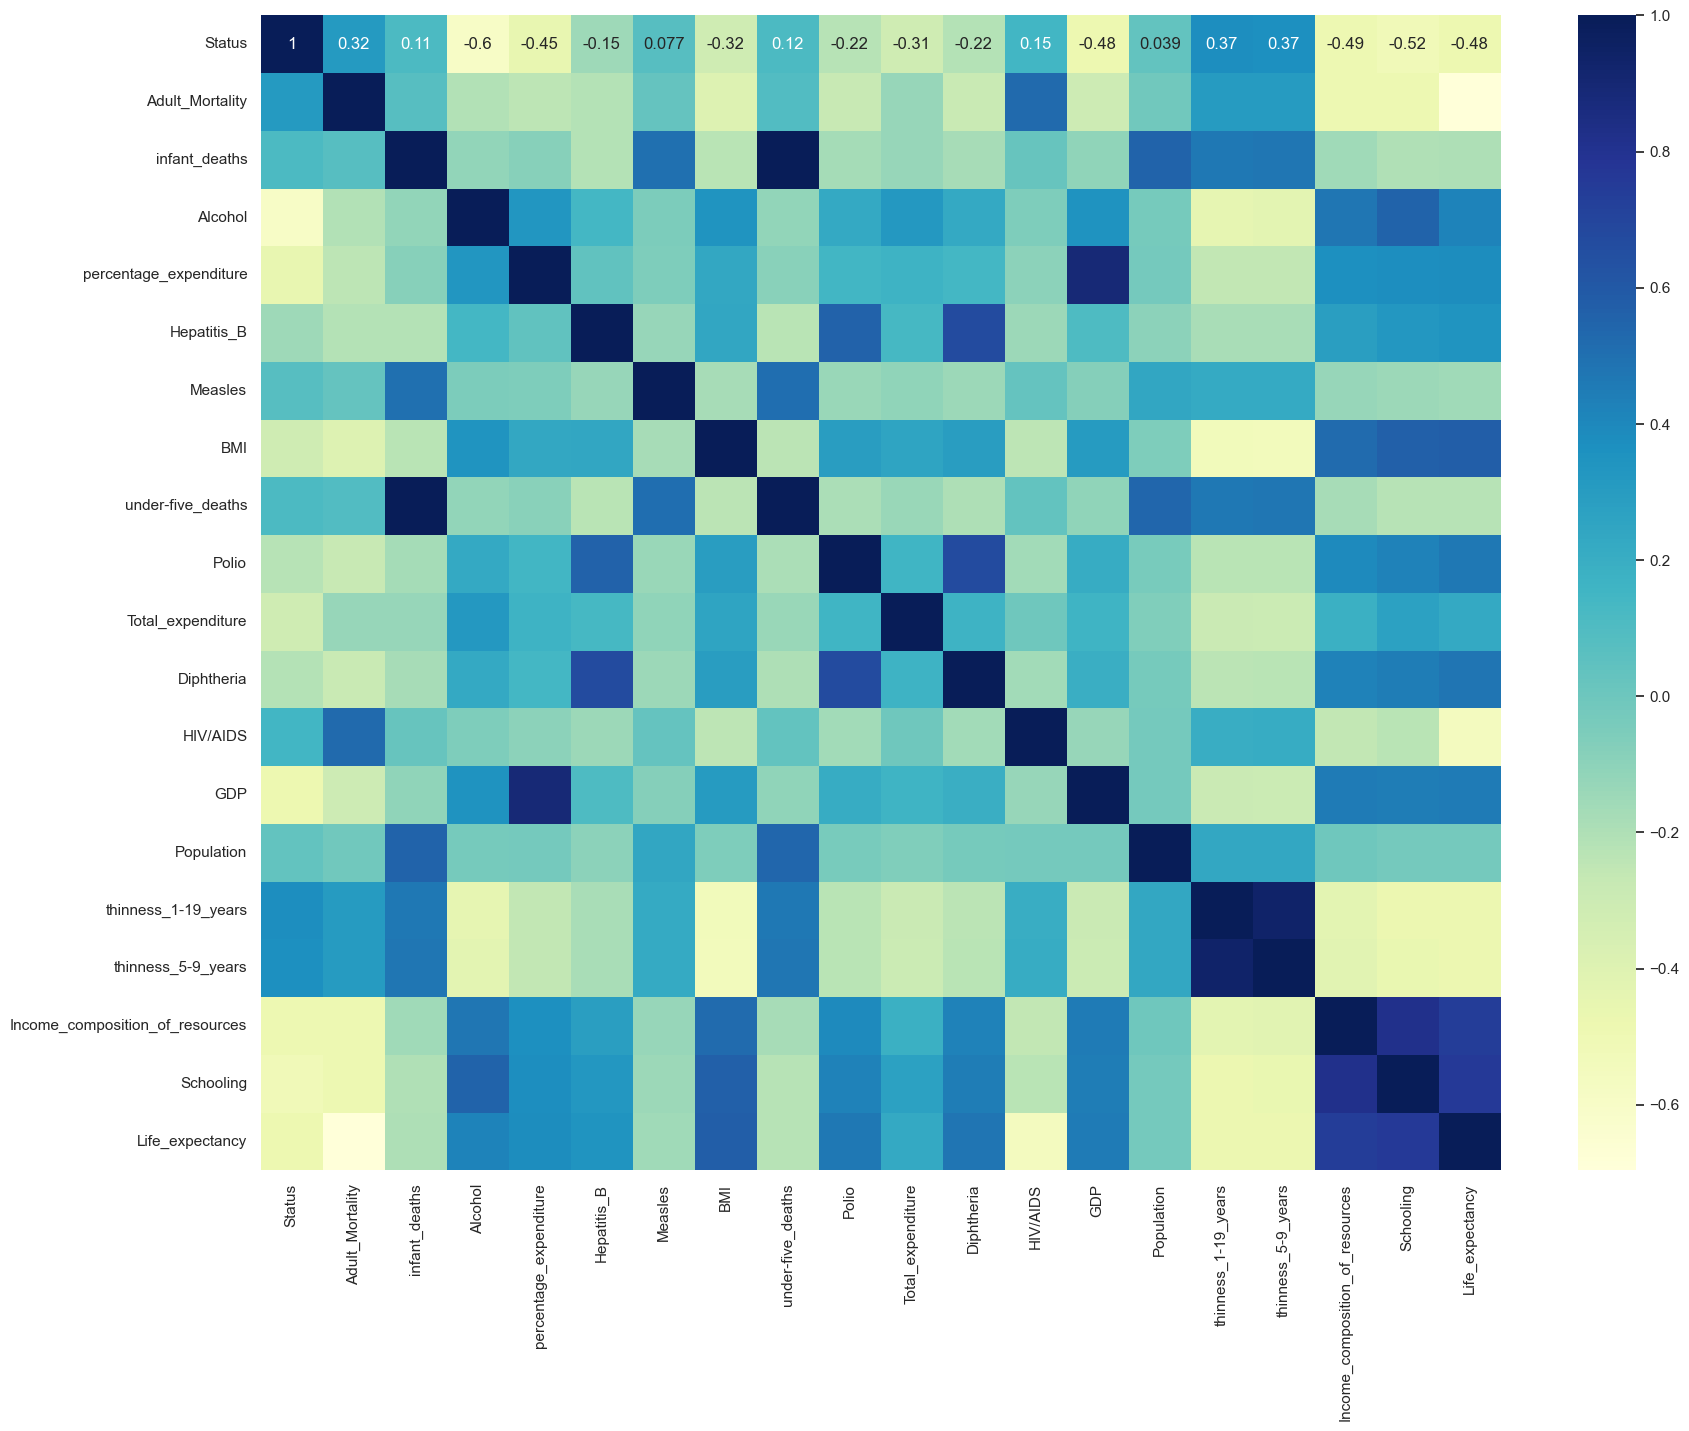

In [36]:
# Checking for correlation between the features

plt.figure(figsize = (20,15))
sns.heatmap(life_exp_final.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

In [37]:
# Highly correlated colums are

# infant_deaths      vs  under-five_deaths
# GDP                vs  percentage_expenditure
# thinness_5-9_years vs  thinness_1-19_years
# Schooling          vs  Income_composition_of_resources

#Dropping columns that are highly correlated

life_exp_final.drop(['under-five_deaths','percentage_expenditure', 'thinness_1-19_years', 
               'Income_composition_of_resources'],axis =1, inplace = True)

In [38]:
print(f'Shape of final dataset: {life_exp_final.shape}')

Shape of final dataset: (2928, 16)


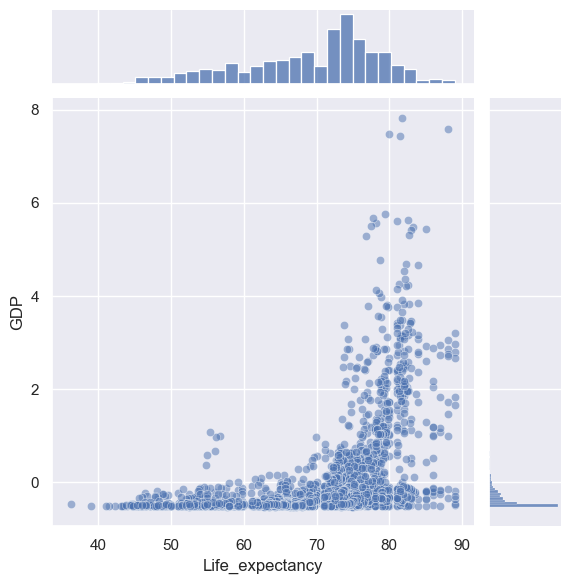

In [39]:
sns.jointplot(x='Life_expectancy', y='GDP', data=life_exp_final, alpha=0.5)

In [40]:
# Splitting the features and target variable

X = life_exp_final.drop('Life_expectancy', axis = 1)
y = life_exp_final['Life_expectancy']

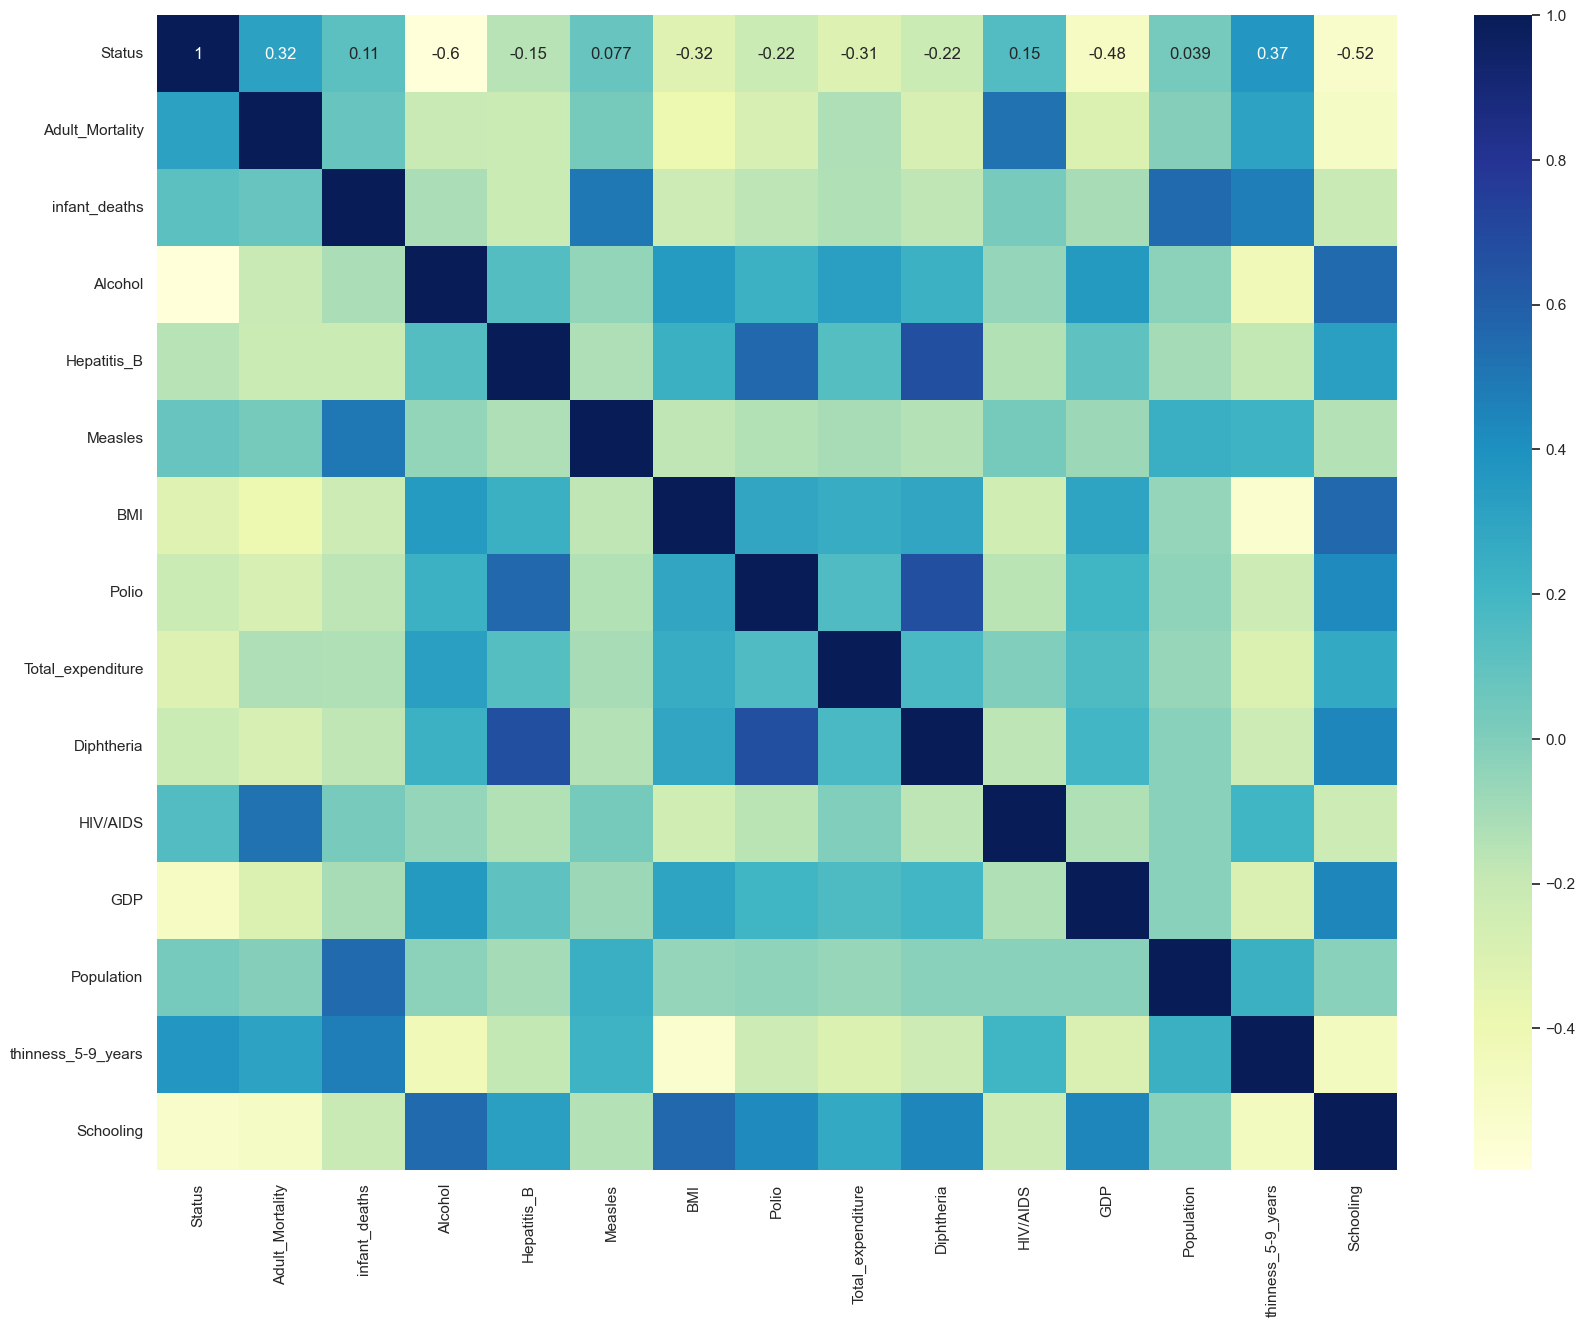

In [41]:
# Ensuring there is no further correlation in our feature variables

plt.figure(figsize = (20,15))
sns.heatmap(X.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

In [42]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [43]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
predictions = lm.predict(X_test)

In [45]:
coefficients = lm.coef_
coefficients

array([-1.11019039, -2.37339035, -0.04699565,  0.06664407, -0.20433461,
       -0.38378326,  0.75333101,  0.7343335 ,  0.04583203,  0.91549522,
       -2.62621641,  0.86015466,  0.10109579, -0.34978849,  3.4231787 ])

In [46]:
intercept = lm.intercept_  # y = mx + c
intercept

70.24342616225775

In [47]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                    Coef
Status             -1.11
Adult_Mortality    -2.37
infant_deaths      -0.05
Alcohol             0.07
Hepatitis_B        -0.20
Measles            -0.38
BMI                 0.75
Polio               0.73
Total_expenditure   0.05
Diphtheria          0.92
HIV/AIDS           -2.63
GDP                 0.86
Population          0.10
thinness_5-9_years -0.35
Schooling           3.42


In [48]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(lm, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 3.2394737295768437


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

accuracy_1 = r2_score(y_test, predictions)
print("Root Squared Error: {} \n".format(accuracy_1))

accuracy_2 = mean_squared_error(y_test, predictions)
print("Mean Squared Error: {}".format(accuracy_2))

Root Squared Error: 0.8187013751480505 

Mean Squared Error: 15.682222691617925


In [50]:
# a dataframe showcasing the actual and the predicted values
results = {'Actual': y_test, 'Predictions': predictions}
results_df = pd.DataFrame(data=results)

In [51]:
results_df.head(50)

,Actual,Predictions
2390,56.50,54.96
196,73.00,68.65
2307,82.50,80.29
1731,75.60,76.47
1100,53.00,60.65
1192,65.20,66.69
1505,72.40,73.16
1159,74.10,75.37
322,77.00,76.04
1350,67.80,72.89
